# Fitbit Data Analysis

## About Fitbit Data Analysis

This project provides some high-level data analysis of steps, sleep, heart rate and weight data from Fitbit tracking.

Please using fitbit_downloader file to first collect and export your data. 

-------

### Dependencies and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from datetime import datetime
import seaborn
%matplotlib inline

-------

# Steps

In [2]:
daily_steps = pd.read_csv('data/daily_steps.csv', encoding='utf-8')

In [3]:
daily_steps['Date'] = pd.to_datetime(daily_steps['Date'])
daily_steps['dow'] = daily_steps['Date'].dt.weekday
daily_steps['day_of_week'] = daily_steps['Date'].dt.weekday_name

In [4]:
daily_steps.tail()

,Date,Steps,dow,day_of_week
360,2018-05-19,7690,5,Saturday
361,2018-05-20,6641,6,Sunday
362,2018-05-21,4168,0,Monday
363,2018-05-22,5162,1,Tuesday
364,2018-05-23,0,2,Wednesday


In [5]:
len(daily_steps)

365

In [6]:
# drop days with now steps
daily_steps = daily_steps[daily_steps.Steps > 0]
len(daily_steps)

36

In [7]:
daily_steps.Steps.max()

9907

In [8]:
daily_steps.Steps.min()

1369

In [9]:
daily_steps.Steps.max()

9907

### Step Charts

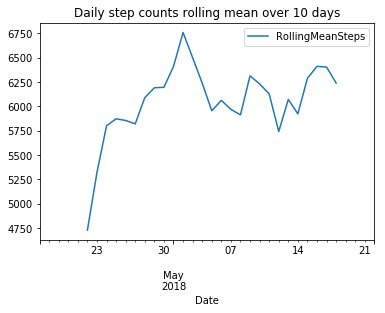

In [10]:
daily_steps['RollingMeanSteps'] = daily_steps.Steps.rolling(window=10, center=True).mean()
daily_steps.plot(x='Date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 10 days')

In [11]:
daily_steps.groupby(['dow'])['Steps'].mean()

dow
0    4492.000000
1    4928.833333
2    5211.600000
3    6216.000000
4    5434.200000
5    7110.600000
6    7439.200000
Name: Steps, dtype: float64

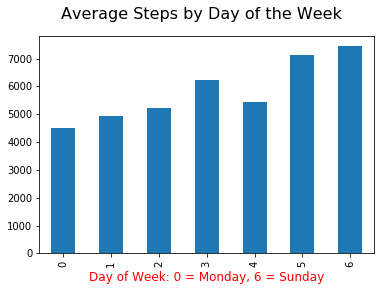

In [12]:
ax = daily_steps.groupby(['dow'])['Steps'].mean().plot(kind='bar', x='day_of_week')
plt.suptitle('Average Steps by Day of the Week', fontsize=16)
plt.xlabel('Day of Week: 0 = Monday, 6 = Sunday', fontsize=12, color='red')

# Sleep

In [13]:
daily_sleep = pd.read_csv('data/daily_sleep.csv', encoding='utf-8')
daily_inbed = pd.read_csv('data/daily_inbed.csv', encoding='utf-8')
len(daily_sleep)

37

In [14]:
sleep_data = pd.merge(daily_sleep, daily_inbed, how='inner', on='Date')

In [15]:
sleep_data['Date'] = pd.to_datetime(sleep_data['Date'])

In [16]:
sleep_data['dow'] = sleep_data['Date'].dt.weekday
sleep_data['day_of_week'] = sleep_data['Date'].dt.weekday_name

In [17]:
sleep_data['day_of_week'] = sleep_data["day_of_week"].astype('category')

In [18]:
sleep_data['InBedHours'] = round((sleep_data.InBed / 60), 2)

In [19]:
sleep_data = sleep_data[sleep_data.Sleep > 0]

In [20]:
len(daily_sleep)

37

In [21]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 35
Data columns (total 7 columns):
Date           35 non-null datetime64[ns]
Sleep          35 non-null int64
Hours          35 non-null float64
InBed          35 non-null int64
dow            35 non-null int64
day_of_week    35 non-null category
InBedHours     35 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3)
memory usage: 2.3 KB


In [22]:
sleep_data.tail()

,Date,Sleep,Hours,InBed,dow,day_of_week,InBedHours
31,2018-05-18,357,5.95,375,4,Friday,6.25
32,2018-05-19,523,8.72,534,5,Saturday,8.90
33,2018-05-20,532,8.87,566,6,Sunday,9.43
34,2018-05-21,395,6.58,410,0,Monday,6.83
35,2018-05-22,396,6.60,409,1,Tuesday,6.82


In [23]:
sleep_data.describe()

,Sleep,Hours,InBed,dow,InBedHours
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,413.371429,6.889429,429.457143,3.000000,7.158000
std,68.032469,1.134162,70.293227,2.029199,1.171341
min,346.000000,5.770000,359.000000,0.000000,5.980000
25%,367.000000,6.115000,378.000000,1.000000,6.300000
50%,381.000000,6.350000,401.000000,3.000000,6.680000
75%,459.000000,7.650000,465.500000,5.000000,7.760000
max,555.000000,9.250000,580.000000,6.000000,9.670000


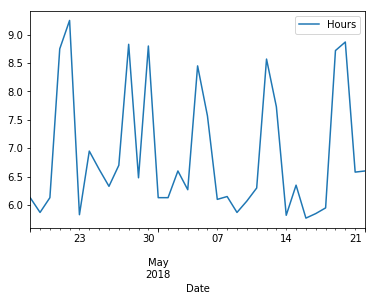

In [24]:
sleep_data.plot(x='Date', y='Hours')

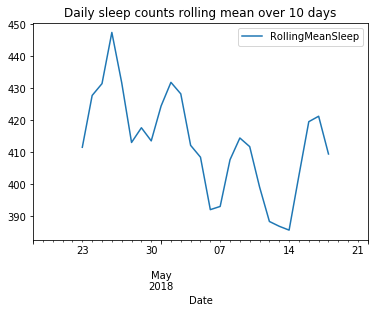

In [25]:
sleep_data['RollingMeanSleep'] = sleep_data.Sleep.rolling(window=10, center=True).mean()
sleep_data.plot(x='Date', y='RollingMeanSleep', title= 'Daily sleep counts rolling mean over 10 days')

In [26]:
sleep_data.groupby(['dow'])['Hours'].mean()

dow
0    6.626
1    6.436
2    6.106
3    6.144
4    6.270
5    8.664
6    7.980
Name: Hours, dtype: float64

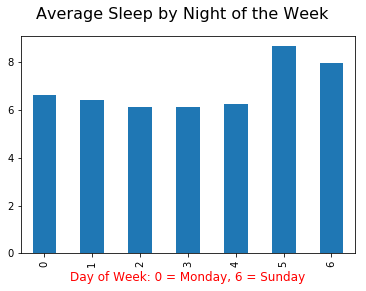

In [27]:
ax = sleep_data.groupby(['dow'])['Hours'].mean().plot(kind='bar', x='day_of_week')
plt.suptitle('Average Sleep by Night of the Week', fontsize=16)
plt.xlabel('Day of Week: 0 = Monday, 6 = Sunday', fontsize=12, color='red')